## Analysing Insurance DataSets
This analysis explores insurance datasets with a primary focus on the 'charges' column. Our goal is to identify patterns, trends, and factors that influence insurance. Additionally, we will develop and evaluate predictive models to accurately forecast charges based on various demographic and health-related features. This comprehensive approach will provide actionable insights for optimizing pricing strategies and enhancing decision-making in the insurance industry.

## Libraries and Data

In [86]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [87]:
import warnings

In [88]:
%%HTML
<style type='text/css'>
table.dataframe td, table.dataframe th
{
    border-style: solid
}

In [89]:
df = pd.read_csv('insurance.csv')
df[:2]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## 1. What is the average insurance charge by age group?

lets Calculate the average charges for different age groups (e.g., 20-30, 30-40). You might find that charges increase significantly with age due to higher health risks.

  age_group       charges
0     20-30   9561.751018
1     30-40  11738.784117
2     40-50  14399.203564
3     50-60  16495.232665
4     60-70  21248.021885


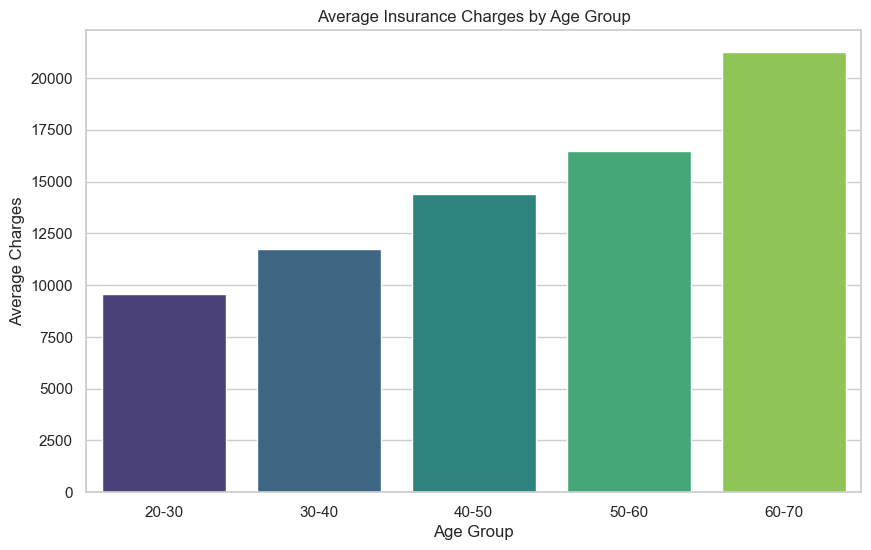

In [92]:
warnings.filterwarnings('ignore')
# Define age groups
bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate average charges by age group
age_group_avg_charges = df.groupby('age_group')['charges'].mean().reset_index()
print(age_group_avg_charges)

# Set plot style
sns.set(style="whitegrid")

# Create a bar plot for average charges by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='charges', data=age_group_avg_charges, palette='viridis')

# Add plot labels and title
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.title('Average Insurance Charges by Age Group')

# Show the plot
plt.show()


**Trend Analysis:** There is a clear upward trend in average insurance charges as age increases. This suggests that insurance costs tend to rise with age, likely due to increased health risks and medical needs associated with older age groups.

**Cost Implications:** The significant increase in charges, especially for the 60-70 age group, highlights the potential financial burden on older individuals when it comes to insurance and healthcare costs.

In summary, this dataset highlights how insurance charges vary across different age groups, with a notable increase in charges as age increases. This information is valuable for various stakeholders in the healthcare and insurance industries to make informed decisions and strategies.

## 2. How do insurance charges differ between smokers and non-smokers?

Compare the average charges for smokers and non-smokers. Smokers are likely to have higher insurance charges because of increased health risks associated with smoking.

  smoker       charges
0     no   8434.268298
1    yes  32050.231832


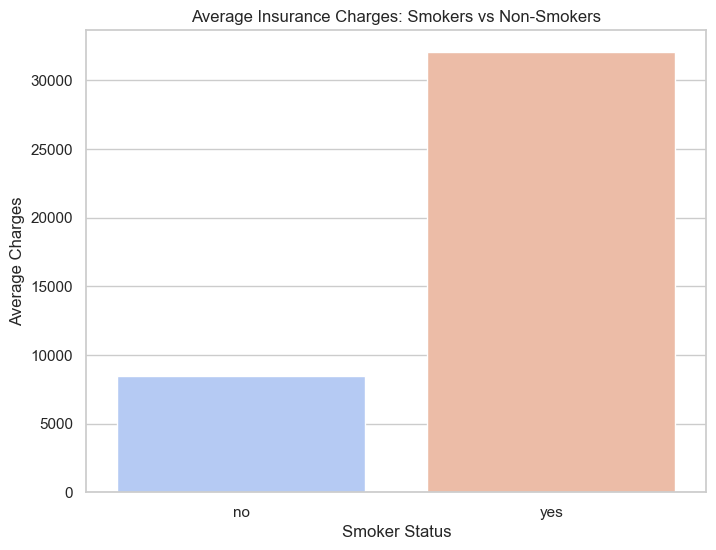

In [93]:
# Calculate average charges for smokers and non-smokers
smoker_avg_charges = df.groupby('smoker')['charges'].mean().reset_index()
print(smoker_avg_charges)

# Set plot style
sns.set(style="whitegrid")

# Create a bar plot for average charges by smoker status
plt.figure(figsize=(8, 6))
sns.barplot(x='smoker', y='charges', data=smoker_avg_charges, palette='coolwarm')

# Add plot labels and title
plt.xlabel('Smoker Status')
plt.ylabel('Average Charges')
plt.title('Average Insurance Charges: Smokers vs Non-Smokers')

# Show the plot
plt.show()


Insights:

**Impact of Smoking on Charges:** There is a stark contrast in average insurance charges between smokers and non-smokers. Smokers have nearly four times the average insurance charges compared to non-smokers. This indicates that smoking is a major factor contributing to higher healthcare costs.

**Health Risk Implications:** The higher charges for smokers reflect the increased health risks and medical expenses associated with smoking-related conditions, such as respiratory diseases, cardiovascular issues, and cancer.

## 3. What is the relationship between BMI and insurance charges?

Plot a scatter plot of BMI against charges and calculate the correlation coefficient. Higher BMI might correlate with higher charges due to obesity-related health issues.

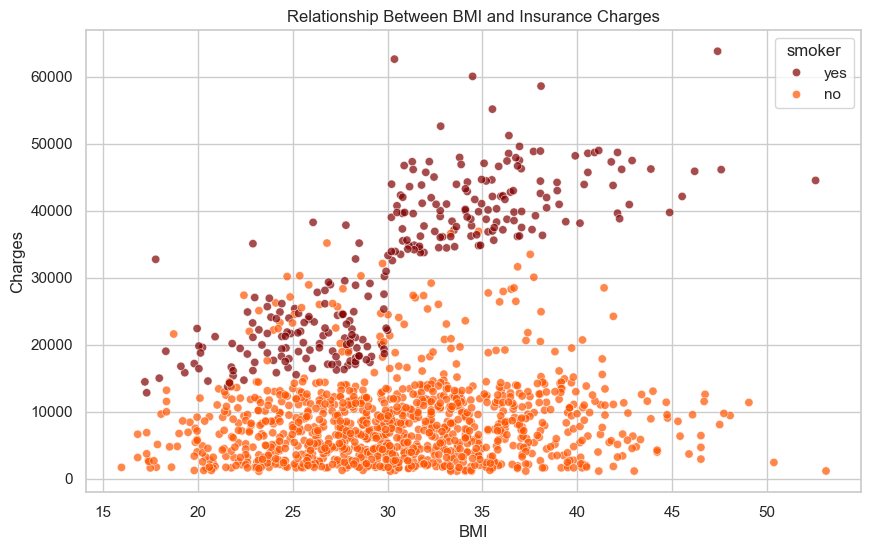

Correlation coefficient between BMI and charges: 0.20


In [94]:
# Set plot style
sns.set(style="whitegrid")

# Create a scatter plot for BMI vs. charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', palette='gist_heat', alpha=0.7)

# Add plot labels and title
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Relationship Between BMI and Insurance Charges')

# Show the plot
plt.show()

# Calculate the correlation coefficient between BMI and charges
correlation = df['bmi'].corr(df['charges'])
print(f'Correlation coefficient between BMI and charges: {correlation:.2f}')


## 4. How does the number of children affect insurance charges?

Group the data by the number of children and calculate the average charges. Families with more children might have higher charges due to more frequent healthcare needs.

   children       charges
0         0  12365.975602
1         1  12731.171832
2         2  15073.563734
3         3  15355.318367
4         4  13850.656311
5         5   8786.035247


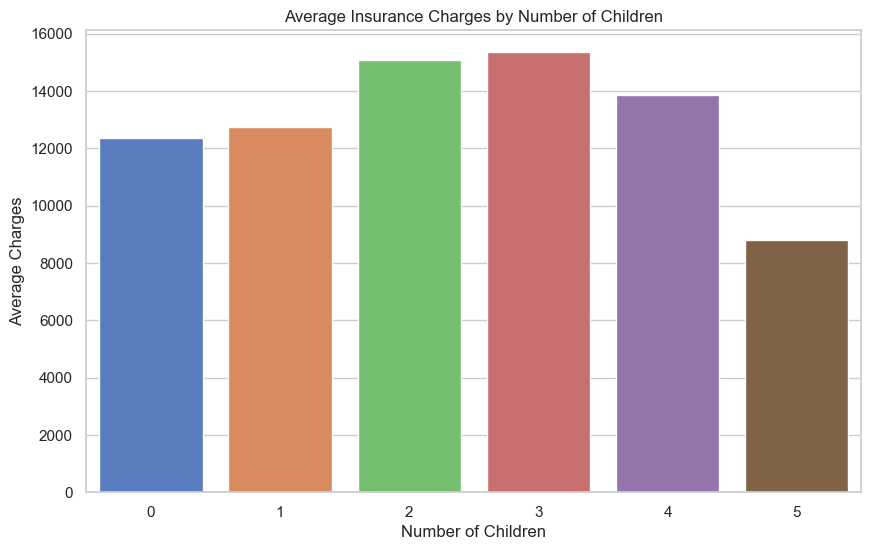

In [95]:
# Calculate average charges based on the number of children
children_avg_charges = df.groupby('children')['charges'].mean().reset_index()
print(children_avg_charges)

# Set plot style
sns.set(style="whitegrid")

# Create a bar plot for average charges by number of children
plt.figure(figsize=(10, 6))
sns.barplot(x='children', y='charges', data=children_avg_charges, palette='muted')

# Add plot labels and title
plt.xlabel('Number of Children')
plt.ylabel('Average Charges')
plt.title('Average Insurance Charges by Number of Children')

# Show the plot
plt.show()

Insights:

**Trend Analysis:** There is a general trend of increasing average insurance charges with the number of children up to three children. However, this trend does not continue linearly as individuals with four children have slightly lower charges, and those with five children have the lowest charges.

**Cost Implications:** The fluctuating charges suggest that factors other than just the number of children might be influencing the average insurance costs. This could include differences in health coverage plans, additional benefits provided by employers, or varying healthcare needs and expenditures among families with different numbers of children.

## 5. Are there significant differences in insurance charges between different regions?

Calculate and compare the average charges across different regions (e.g., northeast, northwest, southeast, southwest). Some regions might have higher charges due to regional healthcare cost differences.

      region       charges
0  northeast  13406.384516
1  northwest  12417.575374
2  southeast  14735.411438
3  southwest  12346.937377


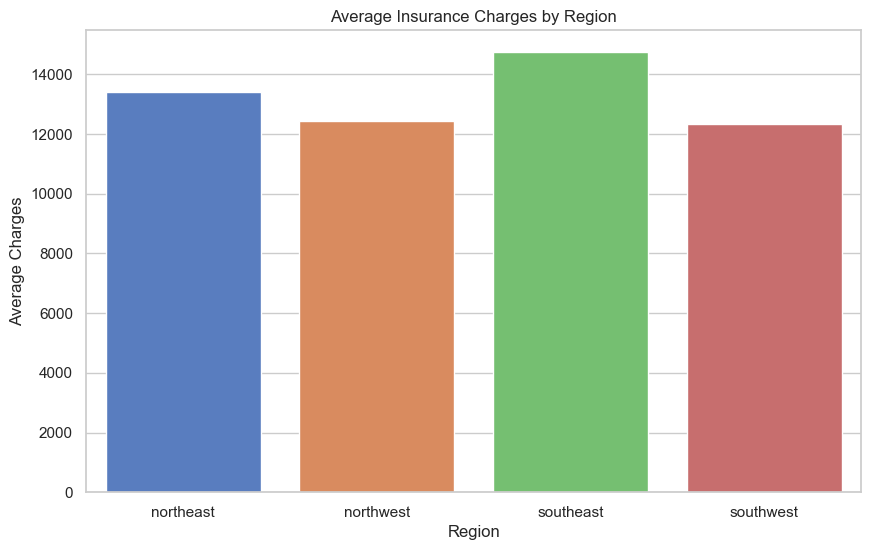

In [96]:
# Calculate average charges by region
region_avg_charges = df.groupby('region')['charges'].mean().reset_index()
print(region_avg_charges)

# Set plot style
sns.set(style="whitegrid")

# Create a bar plot for average charges by region
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', data=region_avg_charges, palette='muted')

# Add plot labels and title
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.title('Average Insurance Charges by Region')

# Show the plot
plt.show()


In summary, this dataset highlights the regional variation in average insurance charges, with the Southeast region having the highest charges and the Southwest region having the lowest. These differences can be attributed to a variety of factors, including healthcare costs, lifestyle, access to healthcare, and regulatory environments. Understanding these variations is crucial for tailoring insurance offerings and policies to better meet regional needs.

## 6. What is the distribution of insurance charges by gender?

Create box plots to visualize the distribution of charges for males and females. This might reveal if one gender tends to have higher or more variable charges.

                mean      median           std
sex                                           
female  12569.578844  9412.96250  11128.703801
male    13956.751178  9369.61575  12971.025915


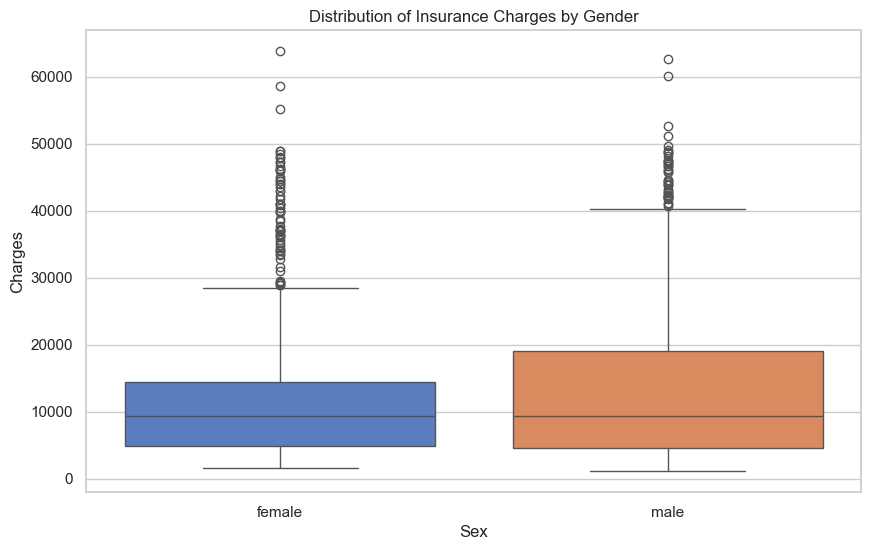

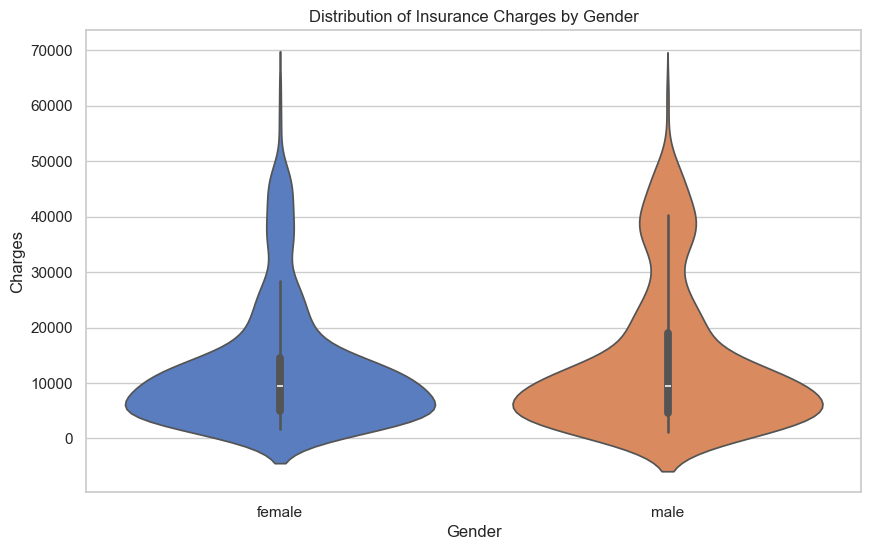

In [97]:
# Group by gender and calculate statistics
gender_stats = df.groupby('sex')['charges'].agg(['mean', 'median', 'std'])
print(gender_stats)

# Set plot style
sns.set(style="whitegrid")

# Create a box plot for insurance charges by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=df, palette='muted')

# Add plot labels and title
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.title('Distribution of Insurance Charges by Gender')

# Show the plot
plt.show()

# Create a violin plot for insurance charges by gender
plt.figure(figsize=(10, 6))
sns.violinplot(x='sex', y='charges', data=df, palette='muted')

# Add plot labels and title
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Distribution of Insurance Charges by Gender')

# Show the plot
plt.show()

Insights:

**Average Charges:** Males have higher average insurance charges (13956.75) compared to females (12569.58). This could be due to various factors such as higher health risks or different healthcare utilization patterns among males.

**Median Charges:** The median charges are relatively close for both sexes (females: 9412.96, males: 9369.62). The similarity in medians suggests that the middle range of charges is comparable for both groups.

**Variability:** The standard deviation is higher for males (12971.03) than for females (11128.70), indicating greater variability in insurance charges for males. This suggests that while some males might have very high charges, others might have significantly lower charges, leading to a wider spread.

**Distribution Shape:** The fact that the mean is higher than the median for both sexes suggests that the distribution of charges is likely right-skewed, with some individuals having very high charges pulling the average up.

## 7. How does age impact insurance charges for smokers vs. non-smokers?

Create age group categories and compare the average charges for smokers and non-smokers within each age group. This might show how smoking exacerbates age-related health risks.

  smoker       charges
0     no   8434.268298
1    yes  32050.231832


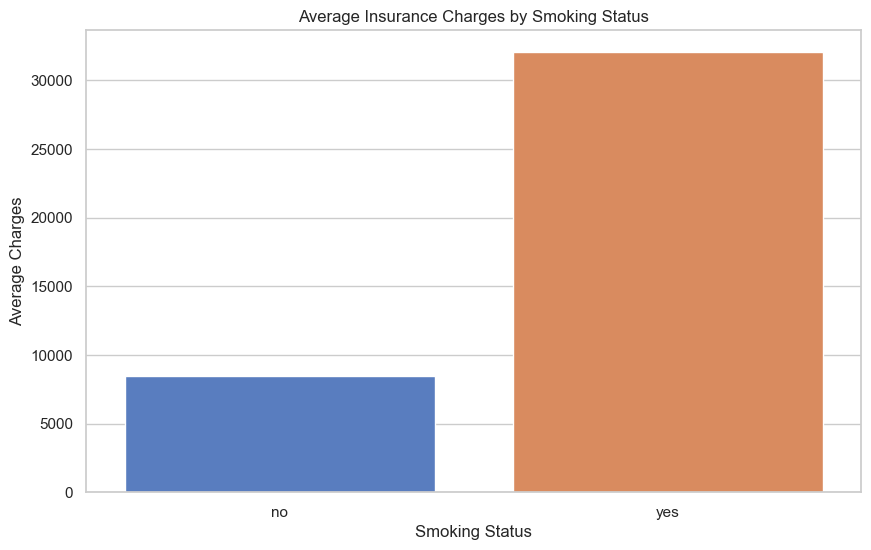

In [98]:
# Calculate average charges based on smoking status
smoker_avg_charges = df.groupby('smoker')['charges'].mean().reset_index()
print(smoker_avg_charges)

# Set plot style
sns.set(style="whitegrid")

# Create a bar plot for average charges by smoking status
plt.figure(figsize=(10, 6))
sns.barplot(x='smoker', y='charges', data=smoker_avg_charges, palette='muted')

# Add plot labels and title
plt.xlabel('Smoking Status')
plt.ylabel('Average Charges')
plt.title('Average Insurance Charges by Smoking Status')

# Show the plot
plt.show()


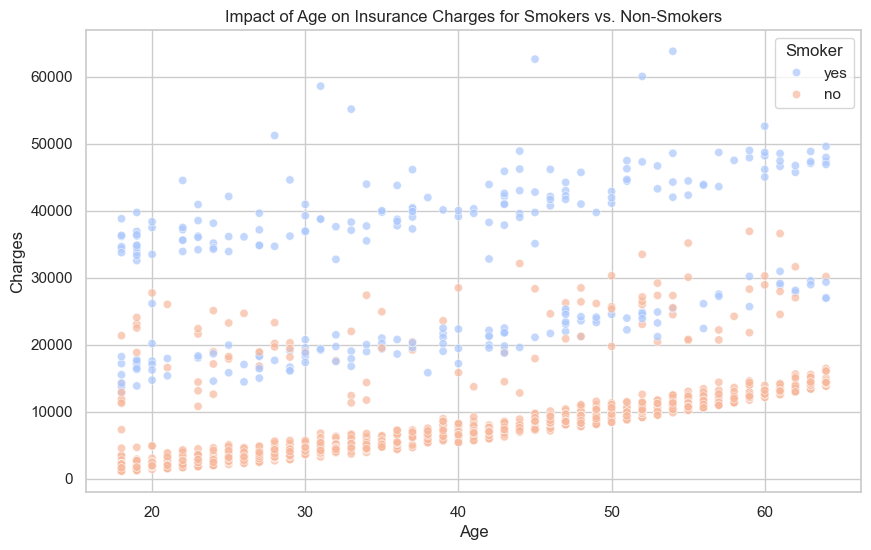

In [99]:
# Set plot style
sns.set(style="whitegrid")

# Create a scatter plot for age vs. charges, differentiated by smoker status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', palette='coolwarm', alpha=0.7)

# Add plot labels and title
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Impact of Age on Insurance Charges for Smokers vs. Non-Smokers')

# Show the plot
plt.legend(title='Smoker')
plt.show()


## 8. What is the impact of being a smoker on insurance charges across different BMI categories?

Divide the dataset into different BMI categories (e.g., underweight, normal, overweight, obese) and compare the average charges for smokers and non-smokers within each category. This can illustrate how smoking and BMI together influence charges.

    bmi_category       charges
0  Normal weight  10379.499732
1        Obesity  15448.682869
2     Overweight  11017.601623
3    Underweight   8852.200585


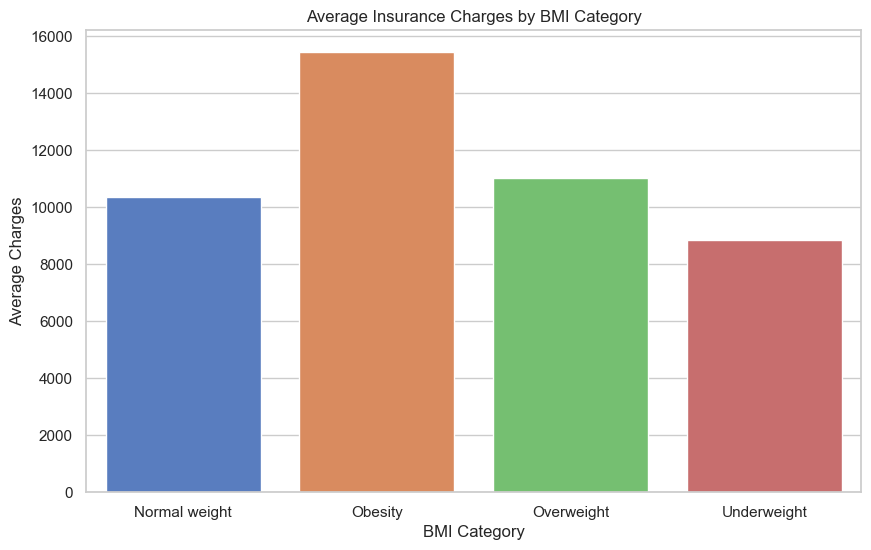

In [100]:
# Define a function to categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

# Apply the function to create a new column 'bmi_category'
df['bmi_category'] = df['bmi'].apply(categorize_bmi)

# Calculate average charges for each BMI category
bmi_avg_charges = df.groupby('bmi_category')['charges'].mean().reset_index()
print(bmi_avg_charges)

# Set plot style
sns.set(style="whitegrid")

# Create a bar plot for average charges by BMI category
plt.figure(figsize=(10, 6))
sns.barplot(x='bmi_category', y='charges', data=bmi_avg_charges, palette='muted')

# Add plot labels and title
plt.xlabel('BMI Category')
plt.ylabel('Average Charges')
plt.title('Average Insurance Charges by BMI Category')

# Show the plot
plt.show()


Insights:

**Impact of BMI on Charges:** There is a clear correlation between BMI category and average insurance charges. As BMI increases, so do the average charges. This reflects the higher healthcare costs associated with obesity-related health conditions.

**Obesity Impact:** Individuals classified as obese face substantially higher insurance charges compared to those with normal or overweight BMI. This suggests that obesity is a significant factor contributing to increased healthcare expenses.

**Underweight Category:** Surprisingly, individuals classified as underweight have the lowest average insurance charges. This could be due to a variety of factors, such as fewer health conditions associated with being underweight or lower healthcare utilization rates in this group.

## 9. How do insurance charges vary for different combinations of gender and region?

Calculate the average charges for each gender within each region. This can help identify if certain regions and genders face higher charges, potentially due to local healthcare practices or cultural factors.

In [101]:
# Group by gender and region
gender_region_stats = df.groupby(['sex', 'region'])['charges'].agg(['mean', 'median', 'std'])
print(gender_region_stats)


                          mean       median           std
sex    region                                            
female northeast  12953.203151  10197.77220  10591.929980
       northwest  12479.870397   9614.07290  10596.572843
       southeast  13499.669243   8582.30230  12587.261506
       southwest  11274.411264   8530.83700  10453.660658
male   northeast  13854.005374   9957.72160  11890.942381
       northwest  12354.119575   8413.46305  11569.561020
       southeast  15879.617173   9504.31030  15083.360816
       southwest  13412.883576   9391.34600  12499.550025


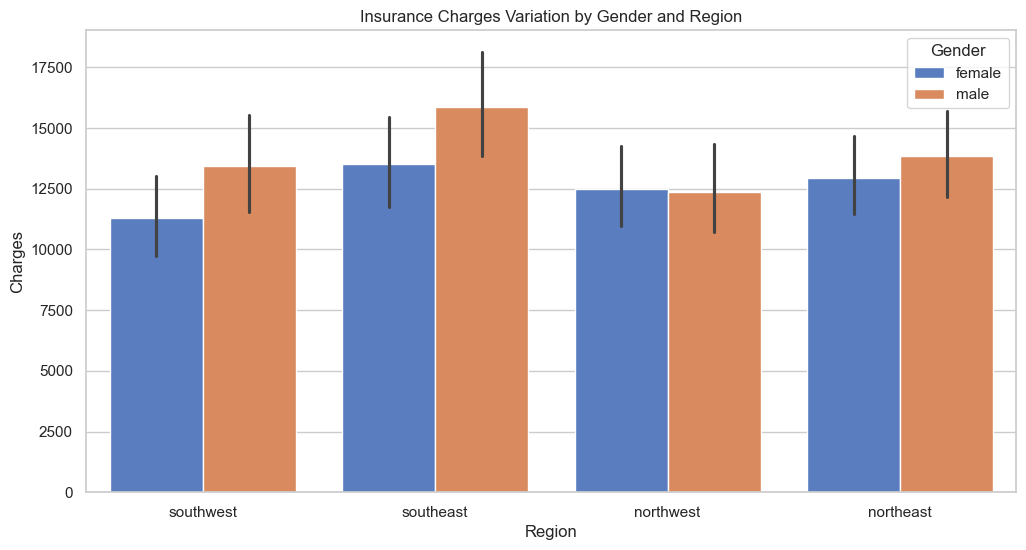

In [102]:
# Set plot style
sns.set(style="whitegrid")

# Create a bar plot for insurance charges by gender and region
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='muted')

# Add plot labels and title
plt.xlabel('Region')
plt.ylabel('Charges')
plt.title('Insurance Charges Variation by Gender and Region')

# Show the plot
plt.legend(title='Gender')
plt.show()


## 10. Can we predict insurance charges based on age, BMI, and smoking status?

Use regression analysis to predict charges based on age, BMI, and smoking status. This model can help understand the relative impact of each factor and predict future charges for new customers.

In [109]:
df_model =  pd.get_dummies(data=df, columns=['smoker', 'sex'], drop_first=True)

In [104]:
from sklearn.model_selection import train_test_split
# Separate features (age, bmi, smoker) and target variable (charges)
X = df_model[['age', 'bmi', 'smoker_yes','sex_male']]
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
from sklearn.linear_model import LinearRegression
# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [106]:
from sklearn.metrics import mean_squared_error, r2_score
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 34515553.66680448
R-squared: 0.7776757765738431


In [107]:
# Example prediction for a new individual
new_data = {'age': [40], 'bmi': [25.0], 'smoker_yes': [1], 'sex_male':[1]}
new_df = pd.DataFrame(new_data)
predicted_charge = model.predict(new_df)
print('Predicted Insurance Charge:', predicted_charge[0])


Predicted Insurance Charge: 30509.225865129847
